Tugas Pengantar Sains Data
1. Maulana Yusuf Ikhsan Robbani (5002211167)
2. Komang Ryandhi Suandita (5002211109)
3. Radityo Ar Rasyid (5002211034)

Source: https://www.kaggle.com/code/thegodchurch/voting-on-steriods

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 27 #611240 for lgbm
N_FOLDS = 5
TARGET = 'Target'

List Model
- Balanced Random Forest
- Random Forest
- Light GBM
- Catboost


In [3]:
train=pd.read_csv('D:/Local Disk C/Python project/src/Tugas/EAS PSD/train.csv')
test=pd.read_csv('D:/Local Disk C/Python project/src/Tugas/EAS PSD/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [5]:
num_cols = train._get_numeric_data().columns
num_cols

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [7]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [8]:
# Pengelompokan Data Kateogrik dan Numerik
category = train.select_dtypes(include='object').columns.tolist()
numeric = train.select_dtypes(include='number').columns.tolist()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

Univariate Analysis

In [9]:
# Statistik Deskriptif Data Numerik
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.00,38258.50,22088.99,0.00,19129.25,38258.50,57387.75,76517.00
Marital status,76518.00,1.11,0.44,1.00,1.00,1.00,1.00,6.00
Application mode,76518.00,16.05,16.68,1.00,1.00,17.00,39.00,53.00
Application order,76518.00,1.64,1.23,0.00,1.00,1.00,2.00,9.00
Course,76518.00,9001.29,1803.44,33.00,9119.00,9254.00,9670.00,9991.00
Daytime/evening attendance,76518.00,0.92,0.28,0.00,1.00,1.00,1.00,1.00
Previous qualification,76518.00,3.66,8.62,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),76518.00,132.38,11.00,95.00,125.00,133.10,140.00,190.00
Nacionality,76518.00,1.23,3.39,1.00,1.00,1.00,1.00,109.00
Mother's qualification,76518.00,19.84,15.40,1.00,1.00,19.00,37.00,44.00


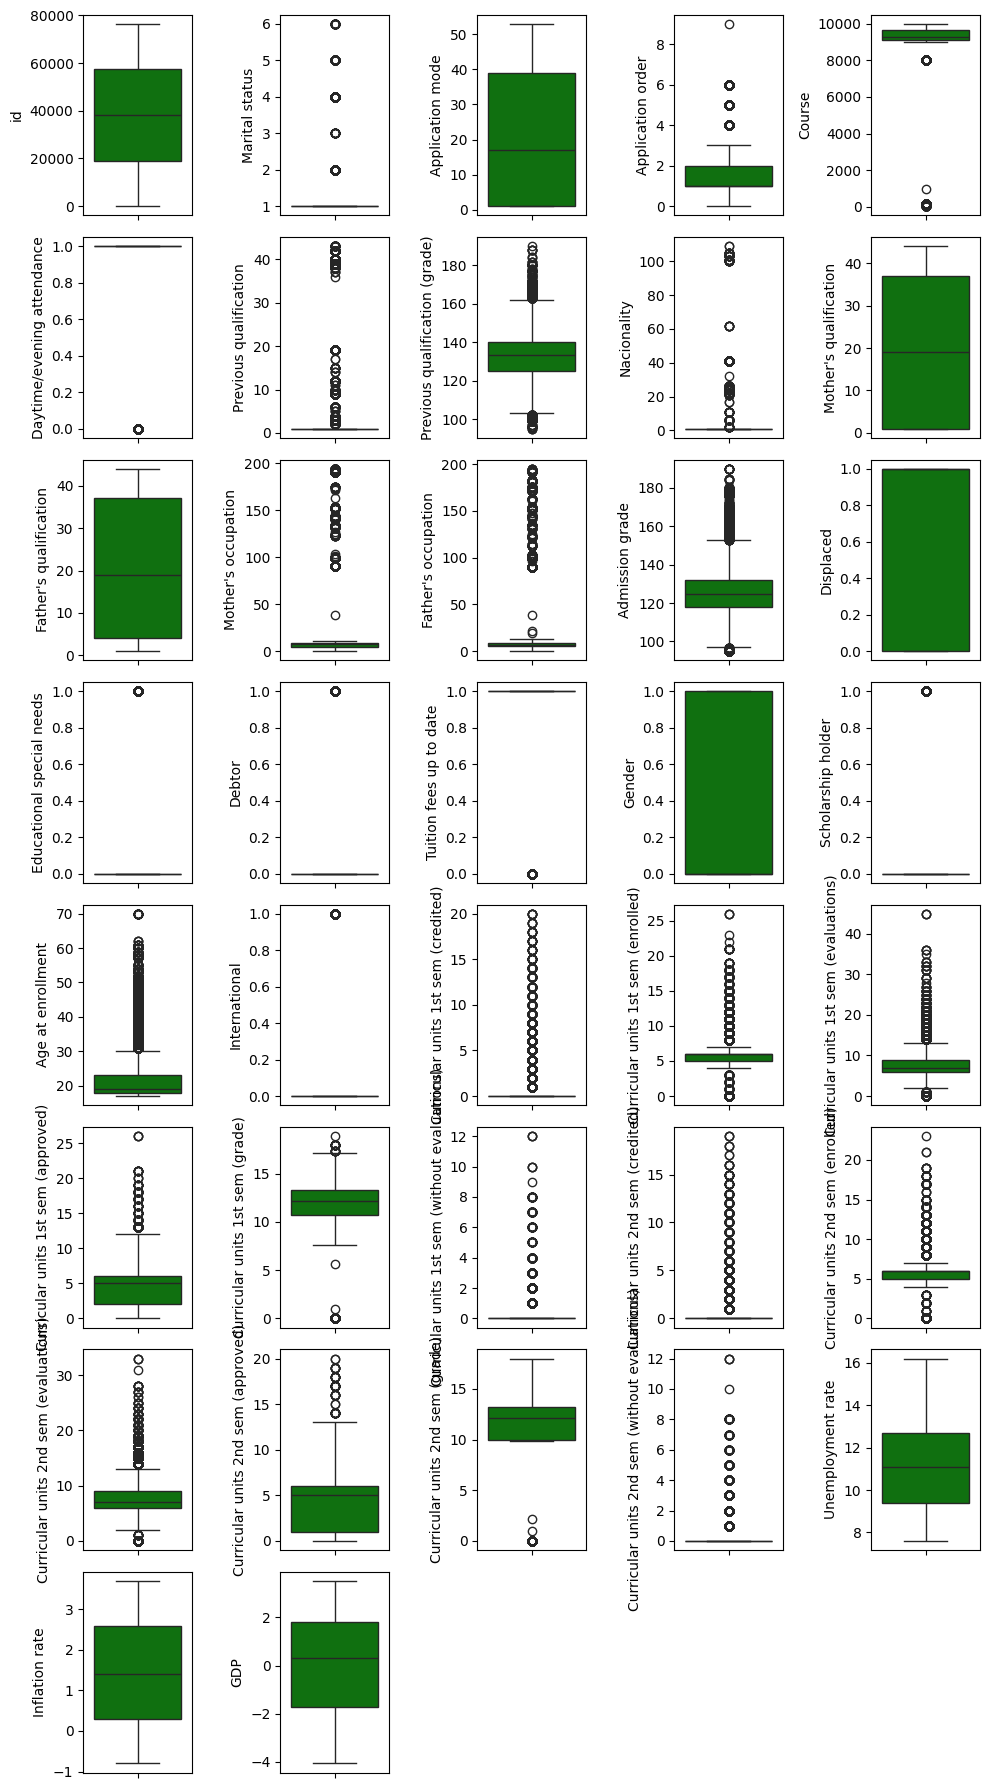

In [15]:
# EDA Menggunakan Boxplot
plt.figure(figsize=(10,18))
for i in range(0, len(numeric)):
    plt.subplot(8, 5, i+1)
    sns.boxplot(y = train[numeric[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_23008\3980092040.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[numeric[i]], color='green')
C:\Users\User\AppData\Local\Temp\ipykernel_23008\3980092040.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[numeric[i]], color='green')
C:\U

ValueError: num must be an integer with 1 <= num <= 15, not 16

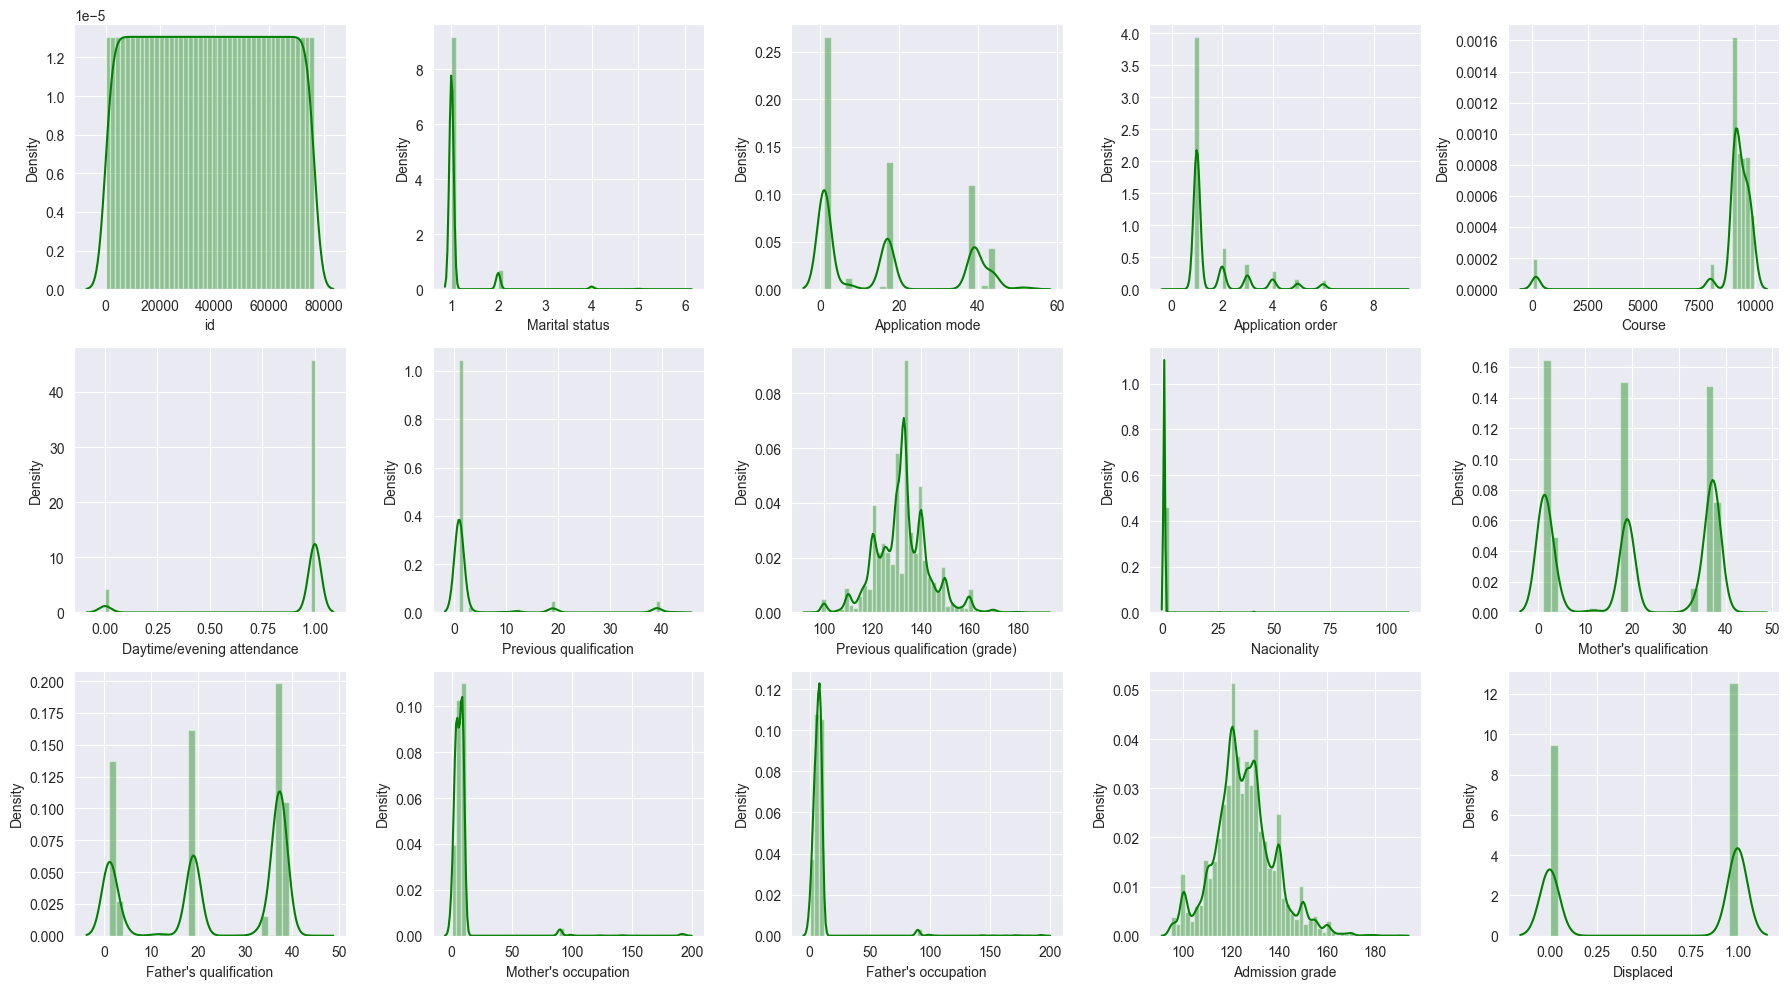

In [ ]:
# EDA Menggunakan Histogram dan KDE plot
plt.figure(figsize=(18, 10))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.distplot(train[numeric[i]], color='green')
    plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1f8a3d1a210>,
 [Text(0.08918847117511143, 1.0963783181956155, 'Graduate'),
  Text(-0.7040520069332361, -0.8451690786660871, 'Dropout'),
  Text(0.8994712205256148, -0.6332073305372903, 'Enrolled')],
 [Text(0.048648257004606225, 0.5980245371976084, '47.4%'),
  Text(-0.3840283674181288, -0.46100131563604746, '33.1%'),
  Text(0.49062066574124436, -0.34538581665670376, '19.5%')])

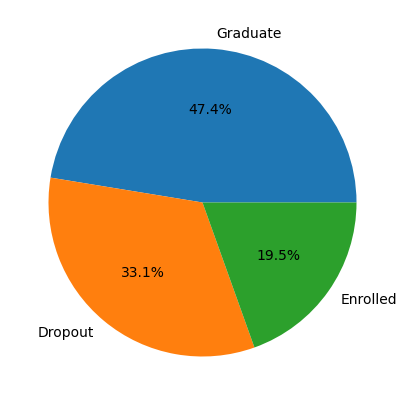

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(train['Target'].value_counts(), labels=['Graduate', 'Dropout', 'Enrolled'], autopct='%1.1f%%')

Multivariate Analysis

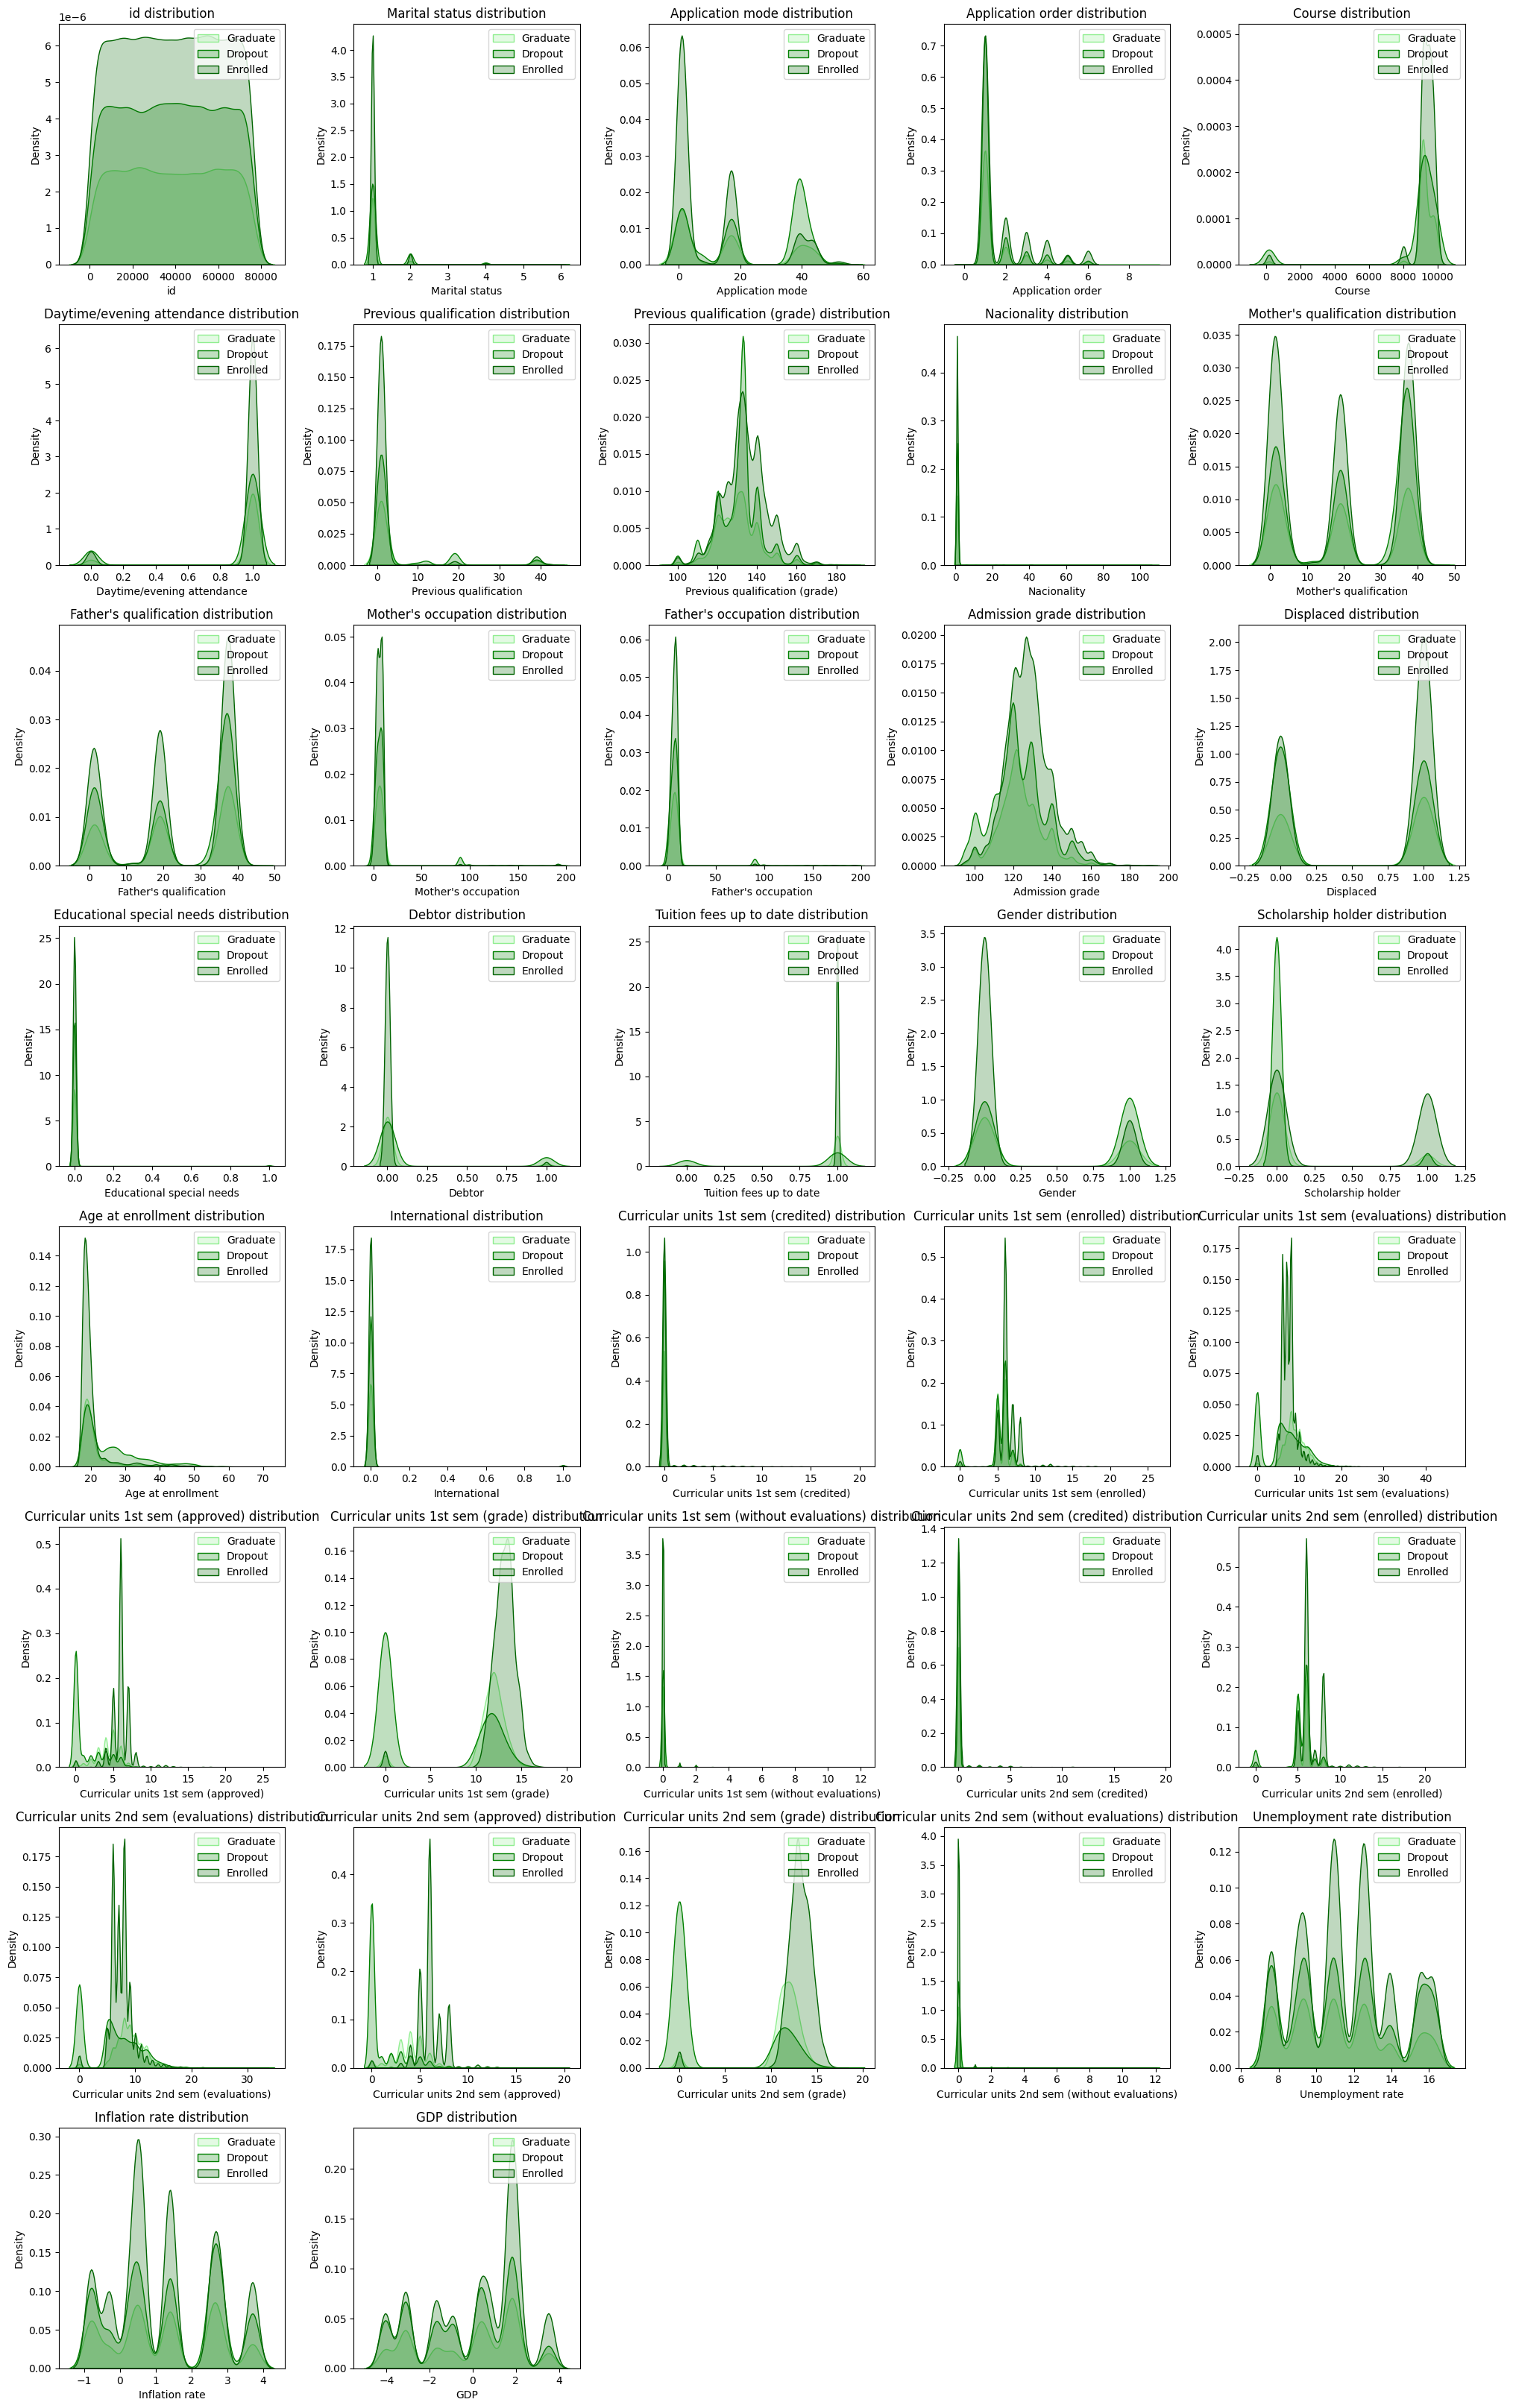

In [17]:
# EDA dengan KDE plot untuk churn
plt.figure(figsize=(20, 36))
for i in range(0, len(numeric)):
    plt.subplot(9, 5, i+1)
    sns.kdeplot(train, x=train[numeric[i]], hue=train['Target'], palette = ['darkgreen','green', 'lightgreen'],
                fill=True).set(title=f'{numeric[i]} distribution')
    plt.legend(['Graduate', 'Dropout', 'Enrolled'], loc='upper right', fontsize=10)
    plt.tight_layout()

<Axes: >

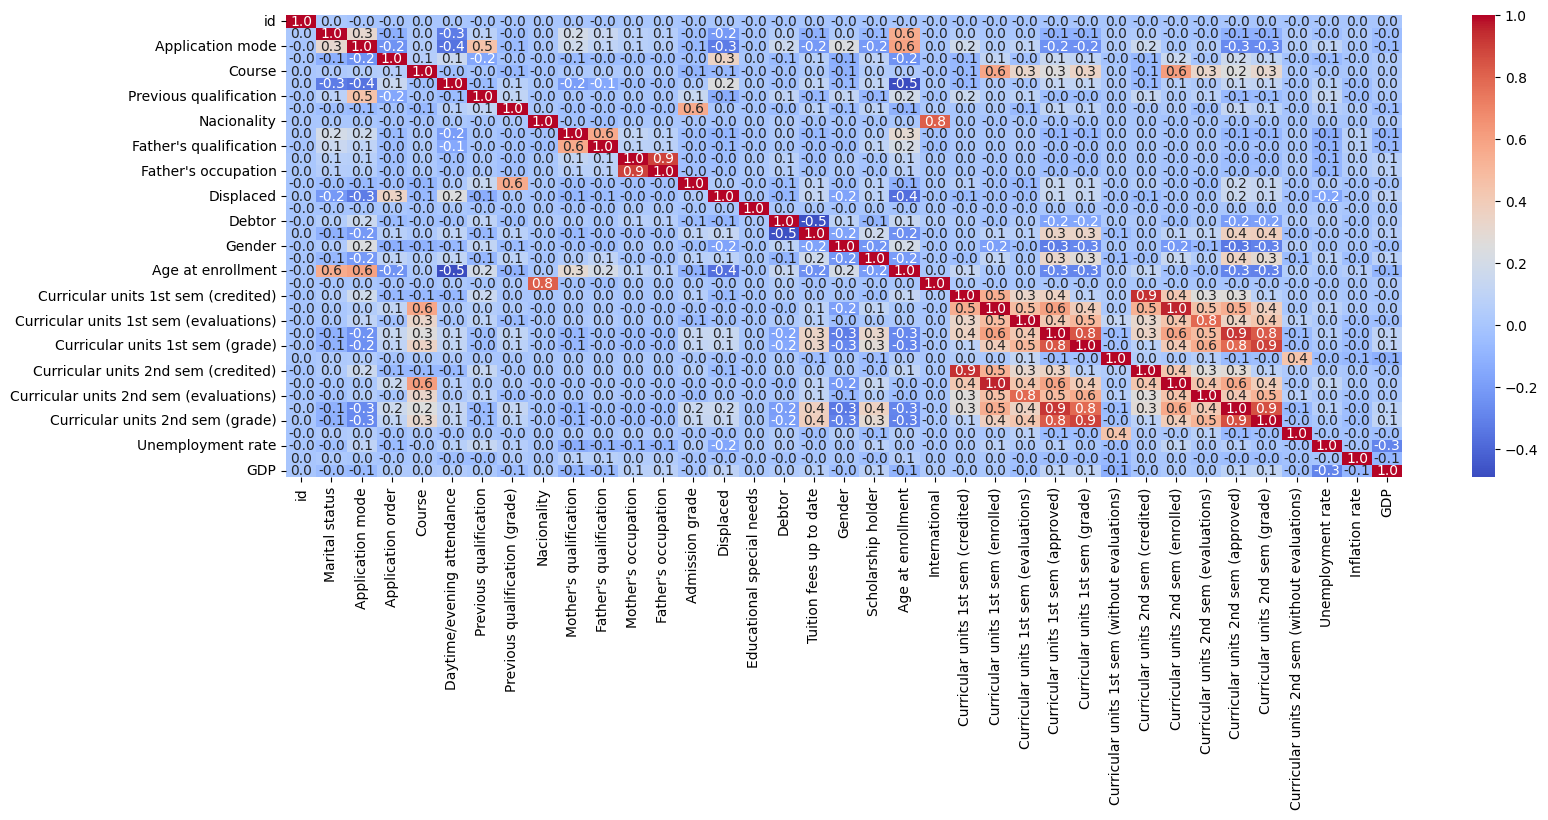

In [24]:
# EDA Menggunakan Correlation Heatmap
correlation = train[numeric].corr()
plt.figure(figsize=(18, 6))
sns.heatmap(correlation, annot=True, fmt=".1f", cmap='coolwarm')

Descriptive

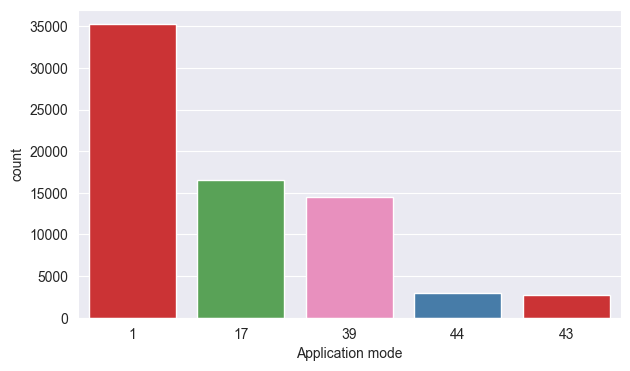

In [27]:
plt.figure(figsize=(7, 4))
sns.set_style('darkgrid')

Application_mode_counts = train['Application mode'].value_counts()
Application_mode_order = Application_mode_counts.sort_values(ascending=False).index[:5]
sns.countplot(x='Application mode', hue='Application mode', data=train, palette='Set1', order=Application_mode_order, legend=False)
plt.title('Application mode Distribution')
plt.show()

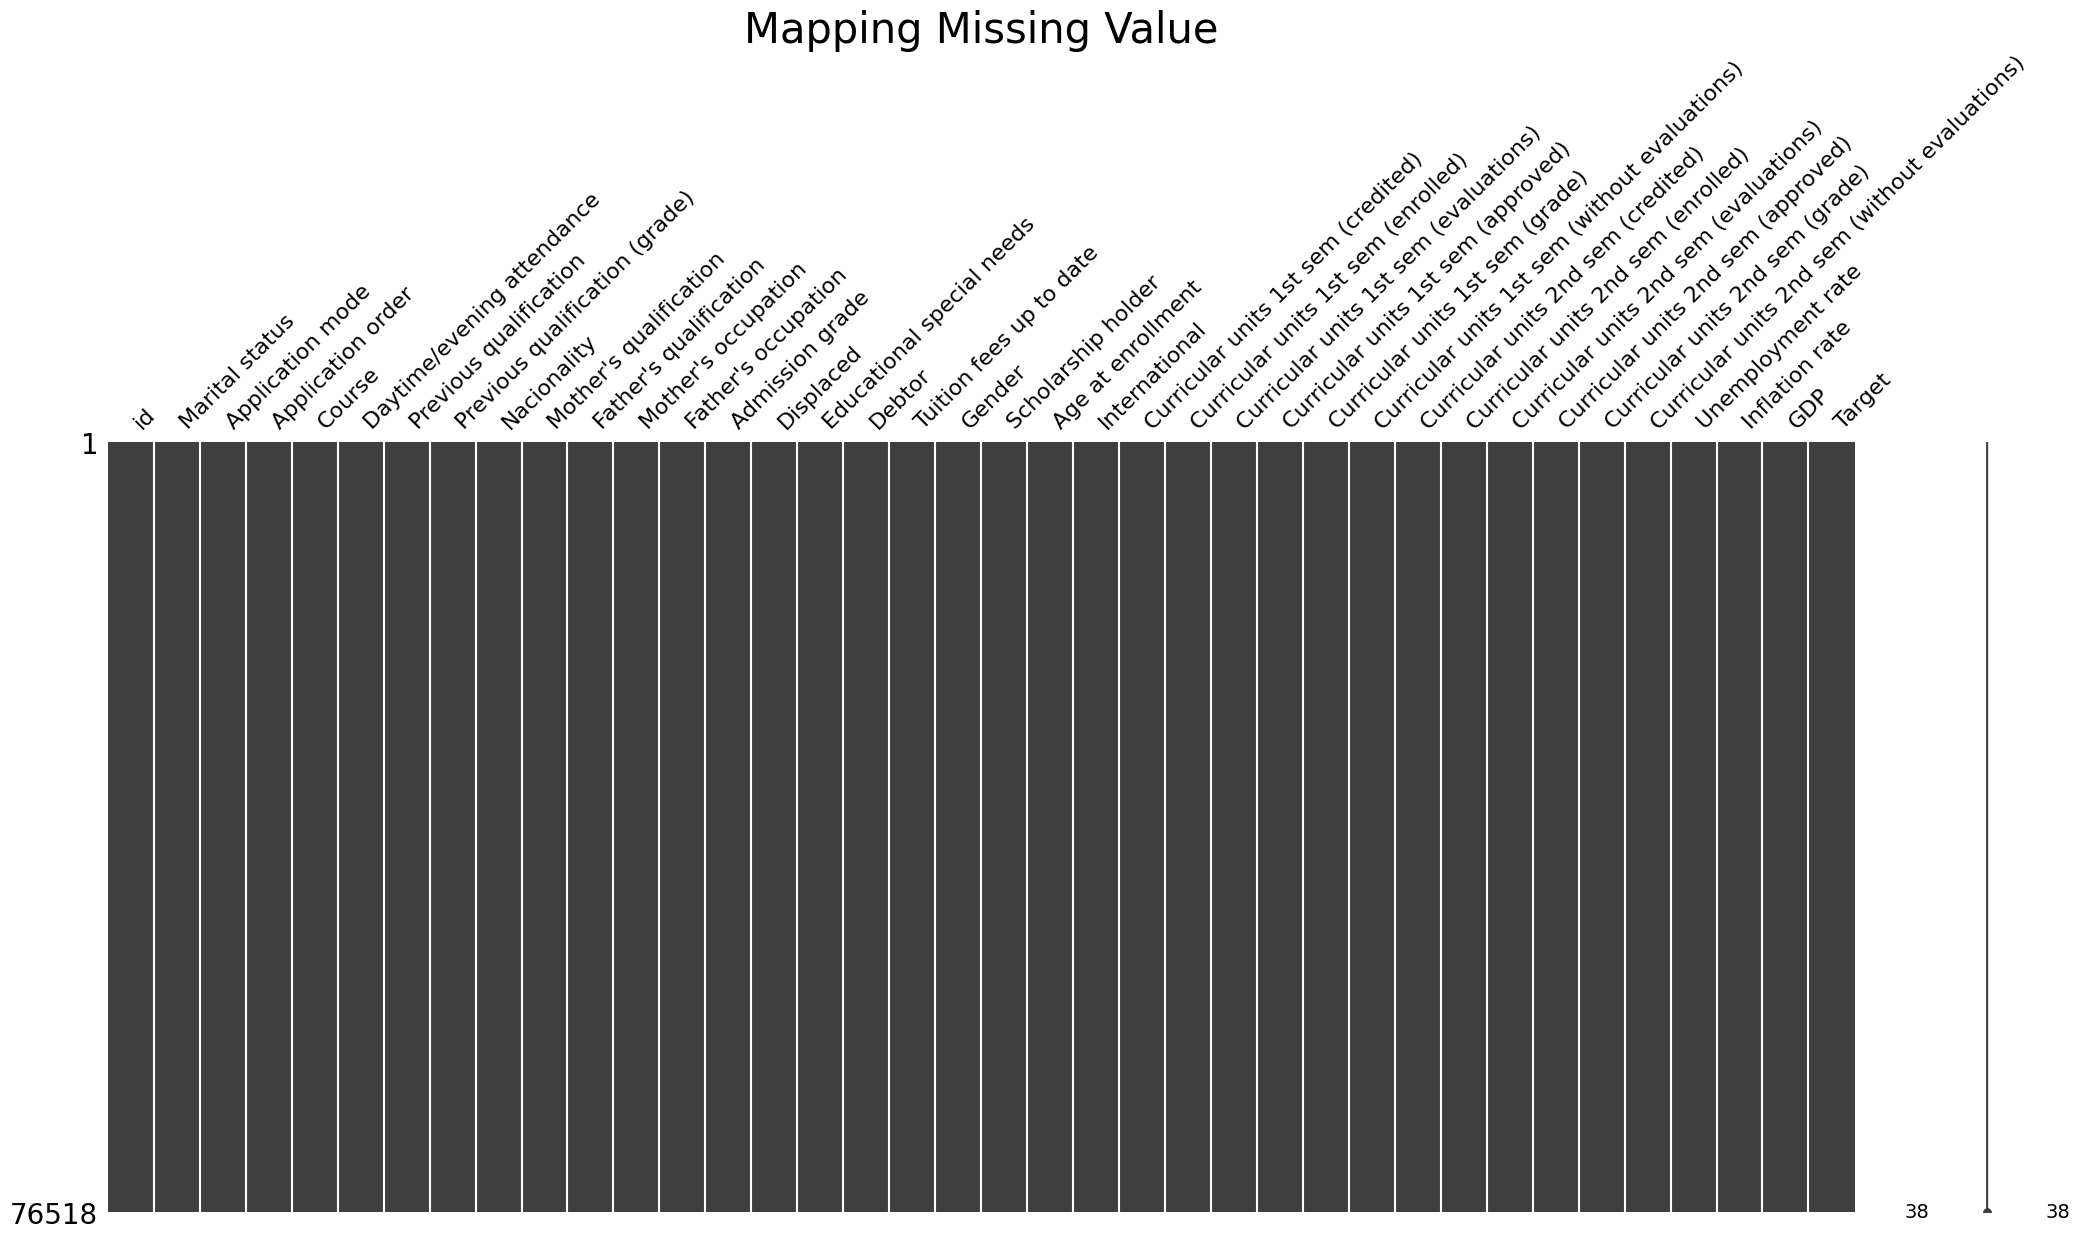

In [18]:
import missingno as msno
msno.matrix(train)
plt.title('Mapping Missing Value', fontsize= 30)
plt.show()

In [35]:
cat_features = [
    'Marital status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]



In [86]:
train['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [87]:
for i in cat_features:
  print(i)
  print(train[i].nunique())

Marital status
6
Application mode
22
Course
19
Previous qualification
21
Nacionality
18
Mother's qualification
35
Father's qualification
39
Mother's occupation
40
Father's occupation
56


Split which feature that neede to one hot or label encoding

In [19]:
label_features = ["Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Marital status']
onehot_features = ['Application mode',
    'Course',
    'Previous qualification',
    'Nacionality']

In [89]:
# # One-hot encoding
# for cat in onehot_features:
#     onehots = pd.get_dummies(test[cat], prefix=cat)
#     test = test.join(onehots)

# for cat in onehot_features:
#     onehots_tr = pd.get_dummies(train[cat], prefix=cat)
#     train = train.join(onehots_tr)

# # Drop original columns
# encode_data_test = test.drop(columns=onehot_features).copy()

# encode_data_train = train.drop(columns=onehot_features).copy()
# # Fill NaN values with 0
# encode_data_test.fillna(0, inplace=True)
# bool_cols = encode_data_test.select_dtypes(include='bool').columns.tolist()
# encode_data_test[bool_cols] = encode_data_test[bool_cols].astype(float)

# encode_data_train.fillna(0, inplace=True)
# bool_cols = encode_data_train.select_dtypes(include='bool').columns.tolist()
# encode_data_train[bool_cols] = encode_data_train[bool_cols].astype(float)

In [90]:
# for col in cat_features:
#     train[col] = train[col].astype('category')
#     test[col] = test[col].astype('category')

In [91]:
# one_hot = OneHotEncoder()

In [92]:
# encode_data_train.head()

In [93]:
# X = encode_data_train.drop(TARGET, axis=1)
# y = encode_data_train[TARGET]

In [20]:
X = train.drop(TARGET, axis=1)
y = train[TARGET]

In [21]:
y.head()

0    Graduate
1     Dropout
2     Dropout
3    Enrolled
4    Graduate
Name: Target, dtype: object

In [22]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
joined = pd.concat([X_resampled, y_resampled], axis=1)

([<matplotlib.patches.Wedge at 0x2694c5c3190>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Graduate'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Dropout'),
  Text(0.5500001486524352, -0.9526278583383436, 'Enrolled')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

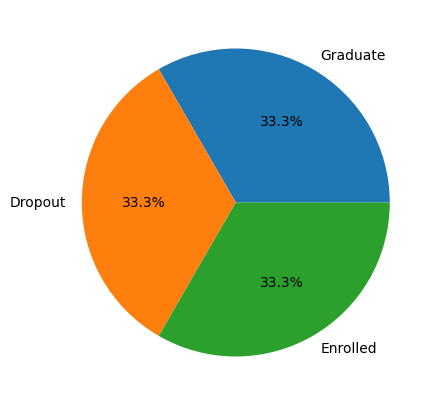

In [24]:
plt.figure(figsize=(10, 5))
plt.pie(joined['Target'].value_counts(), labels=['Graduate', 'Dropout', 'Enrolled'], autopct='%1.1f%%')

<BarContainer object of 3 artists>

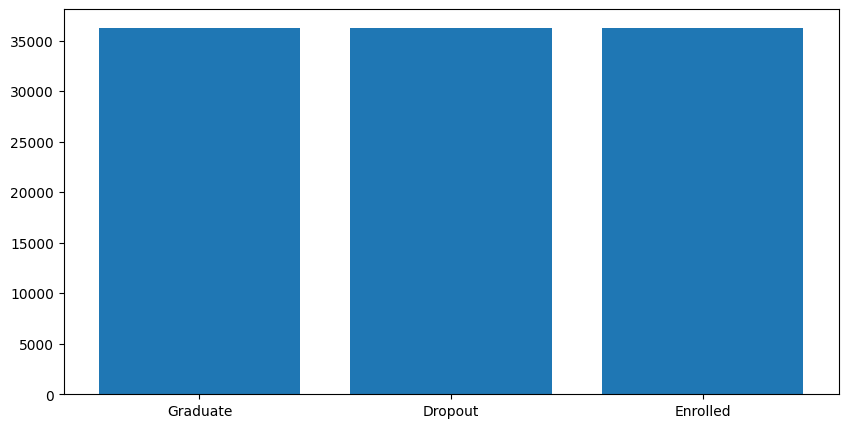

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(joined['Target'].value_counts().index, joined['Target'].value_counts().values)

In [28]:
y_resampled.head()

0    Graduate
1     Dropout
2     Dropout
3    Enrolled
4    Graduate
Name: Target, dtype: object

In [29]:
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

In [31]:
y_resampled

array([2, 0, 0, ..., 1, 1, 1])

In [32]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_train_scaled = pd.DataFrame(scaler.transform(X_resampled), columns=X_resampled.columns)

In [33]:
X_train_scaled.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-1.72,-0.23,-0.96,-0.49,0.13,0.31,-0.32,-0.56,-0.07,-1.27,...,-0.14,-0.14,0.14,-0.09,0.91,0.57,-0.14,-0.14,-0.47,1.00
1,-1.72,-0.23,0.03,-0.49,0.13,0.31,-0.32,-0.66,-0.07,-0.05,...,-0.14,-0.14,0.14,0.49,-1.37,-1.75,-0.14,-0.14,-0.47,1.00
2,-1.72,-0.23,0.03,0.40,0.14,0.31,-0.32,0.50,-0.07,-1.13,...,-0.14,-0.14,0.14,-2.13,-1.37,-1.75,-0.14,1.86,-0.70,-0.37
3,-1.72,-0.23,-0.96,1.29,0.28,0.31,-0.32,-0.08,-0.07,-0.05,...,-0.14,-0.14,1.43,1.07,1.29,0.64,-0.14,-0.14,-0.47,1.00
4,-1.72,-0.23,-0.96,0.40,0.28,0.31,-0.32,0.02,-0.07,-0.05,...,-0.14,-0.14,0.78,1.36,0.91,0.66,-0.14,-1.52,1.03,0.21


In [100]:
# one_hot = OneHotEncoder()
# one_hot.fit(X_train_scaled[onehot_features])
# one_hot_encoded = one_hot.transform(X_train_scaled[onehot_features]).toarray()

In [101]:
# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_resampled, test_size=0.2, random_state=42)



In [36]:
SEED = 27
xgb_params = {
    'n_jobs': -1,
    'max_bin': 86,
    'verbosity': 0,
    'max_depth': 5,
    'max_leaves': 64,
    'booster': 'gbtree',
    'n_estimators': 1539,
    'random_state': SEED,
    'enable_categorical': True,
    'gamma': 0.9069384135972282,
    'reg_alpha': 9.076826031603096,
    'subsample': 0.9335856723937552,
    'reg_lambda': 3.7191495119106976,
    'max_delta_step': 1.1802158903460869,
    'min_child_weight': 8.745168792677534,
    'colsample_bynode': 0.8390631221126779,
    'colsample_bytree': 0.5534666374509267,
    'colsample_bylevel': 0.5695267422612745,
}

cb_params = {
    'depth': 9,
    'verbose': False,
    'thread_count': -1,
    'iterations': 1830,
    'border_count': 200,
    'random_state': SEED,
    'min_child_samples': 4,
    'bootstrap_type': 'Bernoulli',  # Supported type
    'grow_policy': 'Depthwise',
    'l2_leaf_reg': 4.349614487163372,
    'random_strength': 0.16489500172653238,
    'cat_features': cat_features,
    'task_type': 'GPU',  # Ensure GPU usage
    'devices': '0'  # Specify GPU device
}

lgbm_params = {
    'n_jobs': -1,
    'verbose': -1,
    'max_depth': 77,
    'num_leaves': 42,
    'subsample_freq': 8,
    'n_estimators': 169,
    'random_state': SEED,
    'min_child_samples': 199,
    'device': 'gpu',
    'subsample': 0.9178993412905838,
    'reg_alpha': 0.9200214666236493,
    'reg_lambda': 0.2652568189927319,
    'min_child_weight': 0.4410010971781976,
    'colsample_bytree': 0.35379935570036725,

}

hgb_params = {
    'verbose': 0,
    'max_depth': 4,
    'max_bins': 250,
    'max_iter': 1522,
    'max_leaf_nodes': 92,
    'random_state': SEED,
    'min_samples_leaf': 44,
    'l2_regularization': 0.4495943539321024,
}

gb_params = {
    'verbose': 0,
    'max_depth': 4,
    'subsample': 0.9,
    'n_estimators': 600,
    'random_state': SEED,
    'learning_rate': 0.05,
}

rf_params = {
    'verbose': 0,
    'max_depth': None,
    'n_estimators': 1200,
    'random_state': SEED,
}

In [37]:
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# Initialize individual models with GPU for XGBoost, LightGBM, and CatBoost
xgboost = XGBClassifier(**xgb_params)
lightgbm = LGBMClassifier(**lgbm_params)
# catboost = CatBoostClassifier(**cb_params)
hist_gradient_boosting = HistGradientBoostingClassifier(**hgb_params)
gradient_boosting = GradientBoostingClassifier(**gb_params)
random_forest = RandomForestClassifier(**rf_params)

# Create a VotingClassifier with the models
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgboost),
        # ('cat', catboost),
        ('lgb', lightgbm),
        ('hgb', hist_gradient_boosting),
        ('gb', gradient_boosting),
        ('rf', random_forest)
    ],
    voting='soft'
)

# Train the VotingClassifier
voting_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
# y_pred = voting_clf.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Voting Classifier Accuracy: {accuracy:.4f}")
# print(classification_report(y_val, y_pred))

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=0.5695267422612745,
                                            colsample_bynode=0.8390631221126779,
                                            colsample_bytree=0.5534666374509267,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=True,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.9069384135972282,
                                            grow_policy=None,
                                            im...
                              HistGradientBoostingClassifier(l2_regularization=0.4495943539321024,
                                                             max_bins=250,
                                                             max_depth=4,
                                                             max_iter=1522,
                                                             max_leaf_nodes=92,
                                                             min_samples_leaf=44,
                                                             random_state=27)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=4,
                                                         n_estimators=600,
                                                         random_state=27,
                                                         subsample=0.9)),
                             ('rf',
                              RandomForestClassifier(n_estimators=1200,
                                                     random_state=27))],
                 voting='soft')

In [39]:
list_model = [xgboost, lightgbm, hist_gradient_boosting, gradient_boosting, random_forest]
for model in list_model:
    scores = cross_val_score(model, X_resampled, y_resampled, cv=N_FOLDS, scoring='accuracy')
    print(f"{model.__class__.__name__} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    

XGBClassifier Accuracy: 0.5163 (+/- 0.1080)
LGBMClassifier Accuracy: 0.4795 (+/- 0.1212)
HistGradientBoostingClassifier Accuracy: 0.4848 (+/- 0.1137)
GradientBoostingClassifier Accuracy: 0.4902 (+/- 0.1082)
RandomForestClassifier Accuracy: 0.6771 (+/- 0.1419)


In [ ]:
feat_importances = pd.Series(importance, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh', title='Feature Importance')

In [38]:
feat_importances = pd.Series(voting_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

In [ ]:
plot_importance(xgboost, importance_type='weight', max_num_features=10)

In [75]:
import pandas as pd

test = pd.read_csv('D:/Local Disk C/Python project/src/Tugas/EAS PSD/test.csv')
# Ensure the test data has the same preprocessing as the training data
# for col in cat_features:
#     test[col] = test[col].astype('category')

# Make predictions on the test data
test_predictions = voting_clf.predict(test)

# Load the sample submission file to ensure the correct format
sample_submission = pd.read_csv('D:/Local Disk C/Python project/src/Tugas/EAS PSD/sample_submission.csv')
# Create the submission DataFrame
submission = pd.DataFrame({
    'id': sample_submission['id'],  # Ensure the 'id' column matches the sample submission
    'Target': label_encoder.inverse_transform(test_predictions)  # Inverse transform if necessary
    
})
# submission['Target'] = submission['Target'].replace('Graduate',1).replace('Dropout',0).replace('Enrolled',2)
# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv
